## Handwritten Digit Recognition

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.images.shape

(1797, 8, 8)

In [5]:
digits.data.shape

(1797, 64)

In [8]:
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [10]:
digits.data[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
digits.target[:40]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

In [16]:
img = digits.images[0]
img.shape

(8, 8)

In [17]:
np.isnan(digits.images).sum()

0

### Data Visualization

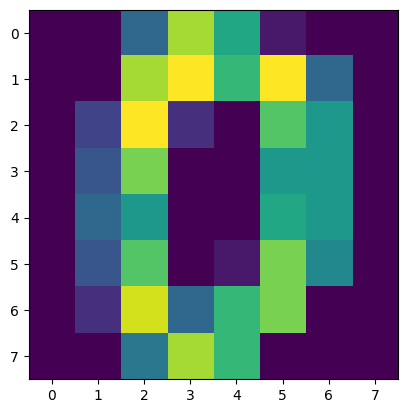

In [20]:
img = digits.images[0]

# plt.figure(figsize=(2,2))
plt.imshow(img)
plt.show()

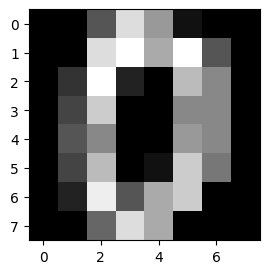

In [22]:
# img = digits.images[0]
plt.figure(figsize=(3,3))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

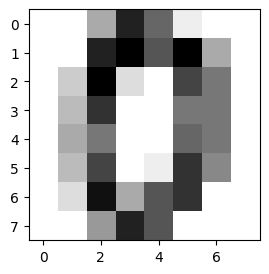

In [23]:
# img = digits.images[0]
plt.figure(figsize=(3,3))
plt.imshow(img, cmap=plt.cm.gray_r)
plt.show()

In [24]:
# ดูทีเดียวหลายภาพ
def visual_multi(i):
    '''Plots 40 digits, เริ่ม ที่ digit i'''
    nplots = 40
    fig = plt.figure(figsize=(8, 4)) # 6x6
    for j in range(nplots):
#         plt.subplot(3,5,j+1)
        plt.subplot(4, 10, j+1)
        plt.imshow(digits.images[i+j], cmap=plt.cm.gray_r)
        plt.title(digits.target[i+j])
        # plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        # plt.tick_params(bottom=False)

    plt.show()

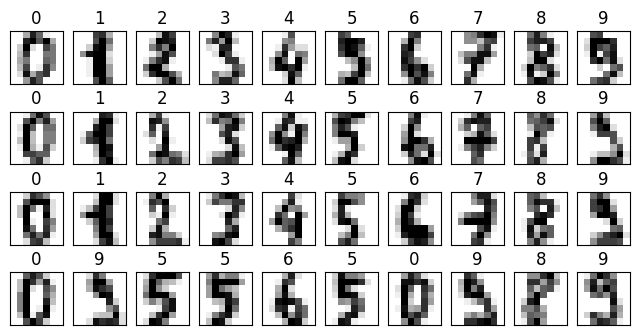

In [25]:
visual_multi(0)

### Prepare Data

In [42]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [45]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [26]:
n_samples = len(digits.images)
n_samples

1797

In [48]:
X = digits.images.reshape(n_samples, -1)
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [49]:
X.shape

(1797, 64)

In [41]:
test = np.array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

test.reshape(1,-1)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [47]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [50]:
y.shape

(1797,)

### Scatter Plot

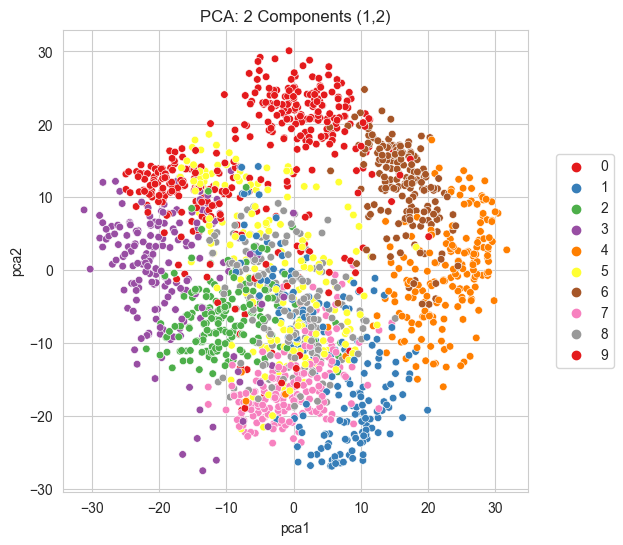

In [52]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df = pd.DataFrame(X_pca, columns=['pca1','pca2'])
df['labels'] = y

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 6,6
g=sns.scatterplot(data=df, x='pca1', y='pca2', hue='labels', s=30, palette='Set1', legend='full')
g.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.title('PCA: 2 Components (1,2)')
plt.show()

## Split Data

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=20)
X_train.shape, X_test.shape

((1078, 64), (719, 64))

## Train Model

In [54]:
from sklearn.svm import SVC

model = SVC()

In [55]:
model.fit(X_train, y_train)

SVC()

## Evaluation

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print('socre: {:.4f}'.format(model.score(X_test,y_test)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

socre: 0.9819
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        63
           3       1.00      0.95      0.97        80
           4       1.00      0.99      0.99        75
           5       0.96      0.99      0.97        71
           6       1.00      0.99      0.99        71
           7       0.95      0.99      0.97        80
           8       0.94      1.00      0.97        64
           9       0.97      0.94      0.95        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719

[[63  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 0  0 63  0  0  0  0  0  0  0]
 [ 0  0  0 76  0  1  0  1  2  0]
 [ 0  0  0  0 74  0  0  0  1  0]
 [ 0  0  0  0  0 70  0  0  0  1]
 [ 0  0  0  0  0  1 70  0  0 

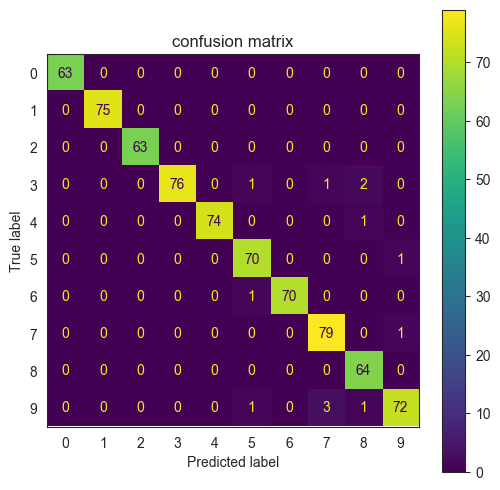

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

sns.set_style('white')

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('confusion matrix')

plt.show()

In [63]:
# Re-Train Model
model = SVC()
model.fit(X, y)

SVC()

## Save Model

In [64]:
import joblib
joblib.dump(model, 'digit_recognition_model.pkl')

['digit_recognition_model.pkl']

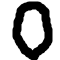

In [69]:
from PIL import Image, ImageOps

# model = SVC()
# model.fit(X, y)

imgfile = 'data/digits/digit0.png'      # digit image file (number zero)

img = Image.open(imgfile).convert('L')  # convert to grayscale
img

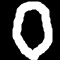

In [70]:
img = ImageOps.invert(img)              # invert
img

In [72]:
img = img.resize((8,8), Image.LANCZOS)
img

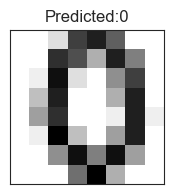

In [75]:
pixel = np.array(img)  # 8x8
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')

my_digit = pixel.reshape(1, -1)  # 1x64
predicted = model.predict(my_digit)
#     print('Digit:{}'. format(predicted[0]))

plt.figure(figsize=(2, 2))
plt.imshow(pixel, cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()

In [76]:
pixel

array([[ 0,  0,  2, 12, 14, 10,  0,  0],
       [ 0,  0, 13, 11,  5, 14,  8,  0],
       [ 0,  1, 15,  2,  0,  7, 12,  0],
       [ 0,  4, 14,  0,  0,  5, 14,  0],
       [ 0,  6, 13,  0,  0,  1, 14,  1],
       [ 0,  1, 16,  4,  0,  6, 14,  0],
       [ 0,  0,  7, 15,  8, 15,  6,  0],
       [ 0,  0,  0,  9, 16,  5,  0,  0]])

In [77]:
my_digit

array([[ 0,  0,  2, 12, 14, 10,  0,  0,  0,  0, 13, 11,  5, 14,  8,  0,
         0,  1, 15,  2,  0,  7, 12,  0,  0,  4, 14,  0,  0,  5, 14,  0,
         0,  6, 13,  0,  0,  1, 14,  1,  0,  1, 16,  4,  0,  6, 14,  0,
         0,  0,  7, 15,  8, 15,  6,  0,  0,  0,  0,  9, 16,  5,  0,  0]])

In [78]:
my_digit.shape

(1, 64)

## Decision Region

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


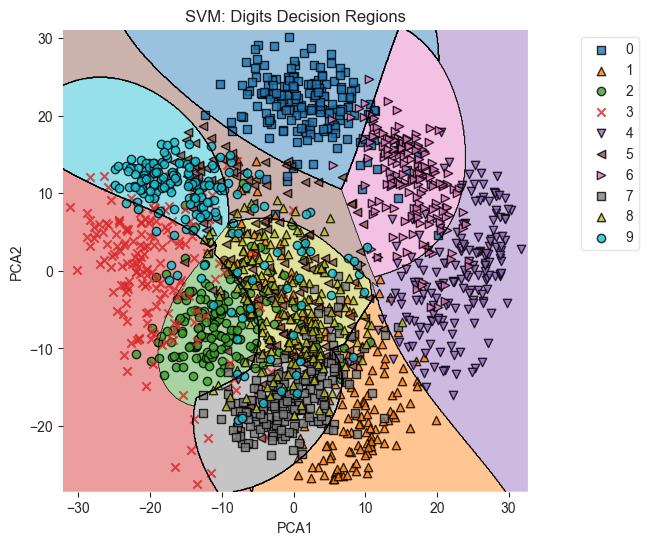

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

model.fit(X_pca, y)

from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(X_pca), y, 
                      clf=model, 
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
class_names = np.unique(y)
ax.legend(handles, class_names, framealpha=0.5, loc='upper left',bbox_to_anchor=(1.1, 1.0))

plt.title('SVM: Digits Decision Regions')

plt.xticks()
plt.yticks()
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.show()